# Introduction

### 1.0.1 Imports

In [1]:
import numpy as np
import pandas as pd
#used to grab the stock prices, with yahoo
import pandas_datareader as web
from datetime import datetime
#to visualize the results
import matplotlib.pyplot as plt
import seaborn

In [2]:
from matplotlib import rcParams
import matplotlib as mpl

blue = '#3498DB'
gray = '#95A5A6'
red = '#E74C3C'
dark_gray = '#34495E'
green = '#2ECC71'
purple = '#9B59B6'
flatui = [blue, gray, red, dark_gray, green, purple]

# Patches
mpl.rc('patch', 
       linewidth=0.5, 
       facecolor=dark_gray, 
       edgecolor='w', 
       force_edgecolor=True, 
       antialiased=True)    
  
# Figure
mpl.rc('figure', 
       figsize= (10, 6),
       facecolor='w', 
       edgecolor='w', 
       titlesize='xx-large',
       titleweight=700)

# Grid
mpl.rc('grid', 
       color=dark_gray,
       alpha=0.5, 
       linewidth=0.5, 
       linestyle='-')

# Axes
mpl.rc('axes', 
       facecolor='w',
       edgecolor=dark_gray,
       linewidth=0.5,
       grid=True,
       titlesize='large',
       labelsize='large',
       labelcolor=dark_gray,
       axisbelow=True)

mpl.rc('axes.spines',
       right=False,
       top=False)

# Ticks
mpl.rc('xtick', 
       direction='out',
       color=dark_gray)

mpl.rc('xtick.major', 
       size=0.0)

mpl.rc('xtick.minor', 
       size=0.0)

mpl.rc('ytick', 
       direction='out',
       color=dark_gray)

mpl.rc('ytick.major', 
       size=0.0)

mpl.rc('ytick.minor', 
       size=0.0)

mpl.rc('legend', 
       frameon=False,
       numpoints=1,
       scatterpoints=1)

mpl.rc('font', 
       size=13,
       weight=400,
       family='sans-serif')

rcParams['font.sans-serif']: ['Helvetica', 'Verdana', 'Lucida Grande']

pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)

# 2 Pull stock prices, push into clean dataframe

In [7]:
#select start date for correlation window as well as list of tickers
start = datetime(2017, 1, 1)
symbols_list = ['AFL', 'MFC', 'PRU', 'MET', 'ALL', 'UNM']

# stock prices for Alfac and its competitors: Aflac, Manulife Financial, Prudential
# Metlife, Allstate, Unum, respectively

In [8]:
#array to store prices
symbols=[]

#pull price using iex for each symbol in list defined above
for ticker in symbols_list: 
    r = web.DataReader(ticker, 'yahoo', start)
    # add a symbol column
    r['Symbol'] = ticker 
    symbols.append(r)

# concatenate into df
df = pd.concat(symbols)
df = df.reset_index()
df = df[['Date', 'Close', 'Symbol']]
df.head()

,Date,Close,Symbol
0,2017-01-03,34.884998,AFL
1,2017-01-04,35.205002,AFL
2,2017-01-05,34.974998,AFL
3,2017-01-06,35.095001,AFL
4,2017-01-09,34.759998,AFL


## 2.1 Pivot the dataframe

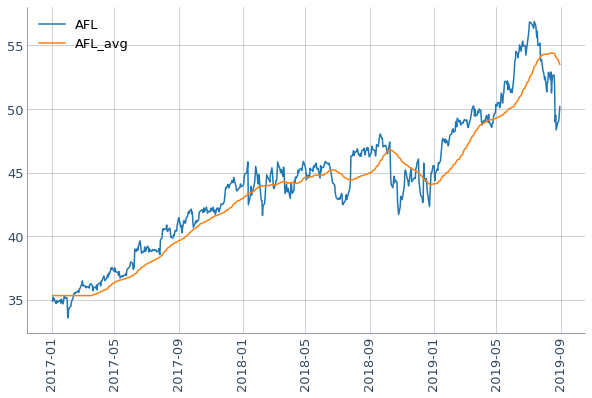

In [28]:
df_pivot = df.pivot('Date','Symbol','Close').reset_index()
#df_pivot.head()

window = 52
AFL_avg = df_pivot.iloc[:,1].rolling(window = window).mean()
df_pivot['{}_avg'.format('AFL')] = AFL_avg
df_pivot.fillna(method = 'bfill', inplace = True)

plt.plot('Date','AFL', data = df_pivot)
plt.plot('Date','AFL_avg', data = df_pivot)
plt.xticks(rotation = 90)
plt.legend()
plt.show()

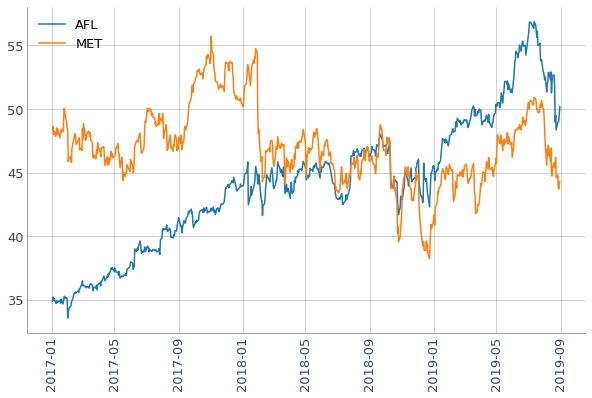

In [12]:
plt.plot('Date','AFL', data = df_pivot)
plt.plot('Date','MET', data = df_pivot)
plt.xticks(rotation = 90)
plt.legend()
plt.show()

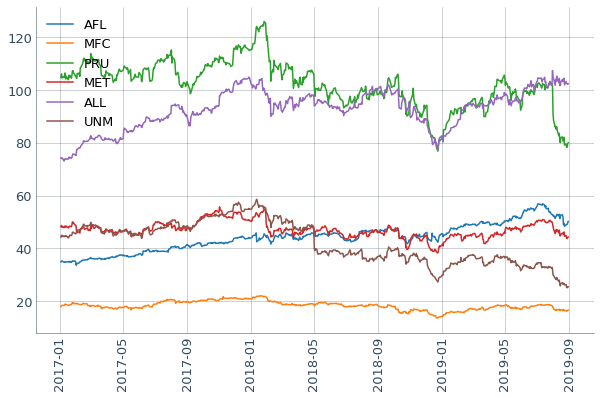

In [21]:
for i in symbols_list:
    plt.plot('Date',i, data = df_pivot)
plt.xticks(rotation = 90)
plt.legend()
plt.show()